
## China PV data

The following published article:

Yao, Tiechui, Jue Wang, Haoyan Wu, Pei Zhang, Shigang Li, Yangang Wang, Xuebin Chi, and Min Shi. 2021. “A Photovoltaic Power Output Dataset: Multi-Source Photovoltaic Power Output Dataset with Python Toolkit.” _Solar Energy_ 230:122–30.

Describes a publicly available dataset named photovoltaic power output dataset (PVOD).  It provides PV output from 10 solar stations in China over the course of a bit less than a year.  What is unique about the dataset is that it provides both local measurement data (LMD) on variables such as irradiance and weather as well as the usual numerical weather prediction (NWP) data one gets from weather services and that is used in most solar forecasting models.  The dataset is available at https://doi.org/10.1016/j.solener.2021.06.013.




<img src="./codebook.png" width="700"> 




Let's explore data from one of the stations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
st = pd.read_csv('../datasets/station00.csv')
st.head()

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2018-08-15 16:00:00,0.0,0.0,22.78,96.85,4.28,339.41,1007.27,0,0,25.900000,1006.299988,353,1.1,0.0
1,2018-08-15 16:15:00,0.0,0.0,22.75,96.91,4.30,337.27,1007.27,0,0,25.900000,1006.200012,330,0.9,0.0
2,2018-08-15 16:30:00,0.0,0.0,22.71,96.95,4.28,334.47,1007.48,0,0,25.799999,1006.299988,1,1.9,0.0
3,2018-08-15 16:45:00,0.0,0.0,22.64,97.12,4.28,331.52,1007.39,0,0,25.600000,1006.299988,309,0.4,0.0
4,2018-08-15 17:00:00,0.0,0.0,22.57,97.15,4.33,329.78,1007.09,0,0,25.700001,1006.299988,335,1.6,0.0


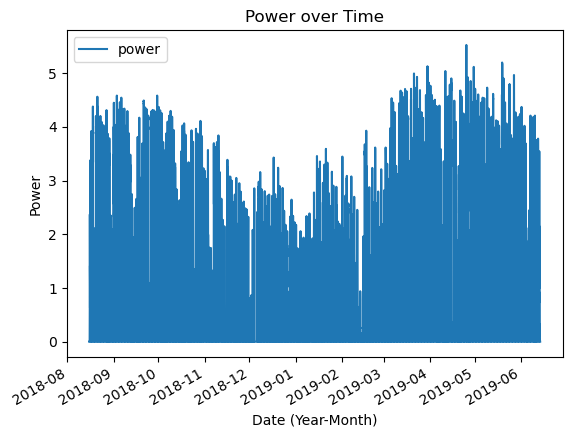

In [5]:
st['date_time'] = pd.to_datetime(st['date_time'])
st.plot(x='date_time', y='power', kind='line')

# Format the x-axis to show only year and month
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xlabel('Date (Year-Month)')
plt.ylabel('Power')
plt.title('Power over Time')
plt.show()


In [6]:
# Filter the dataframe for May 2019
may_2019 = st[(st['date_time'] >= '2019-05-01') & (st['date_time'] < '2019-06-01')]


<Figure size 1800x2800 with 0 Axes>

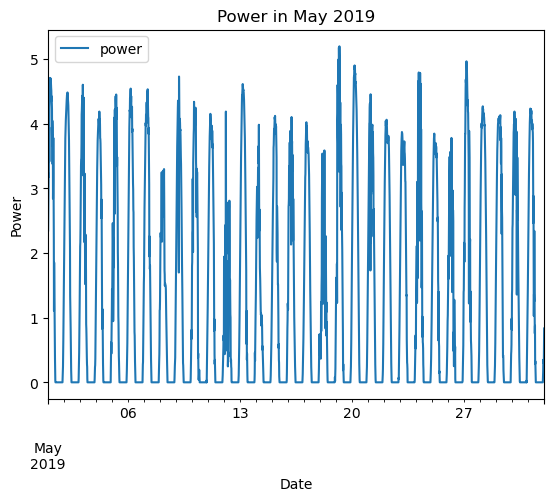

In [13]:
plt.figure(figsize=(18, 28))
may_2019.plot(x='date_time', y='power', kind='line')
plt.xlabel('Date')
plt.ylabel('Power')
plt.title('Power in May 2019');

In [14]:
# Filter the dataframe for May 26, 2019
may_24_2019 = may_2019[(may_2019['date_time'] >= '2019-05-24') & (may_2019['date_time'] < '2019-05-25')]
may_25_2019 = may_2019[(may_2019['date_time'] >= '2019-05-25') & (may_2019['date_time'] < '2019-05-26')]
may_26_2019 = may_2019[(may_2019['date_time'] >= '2019-05-26') & (may_2019['date_time'] < '2019-05-27')]

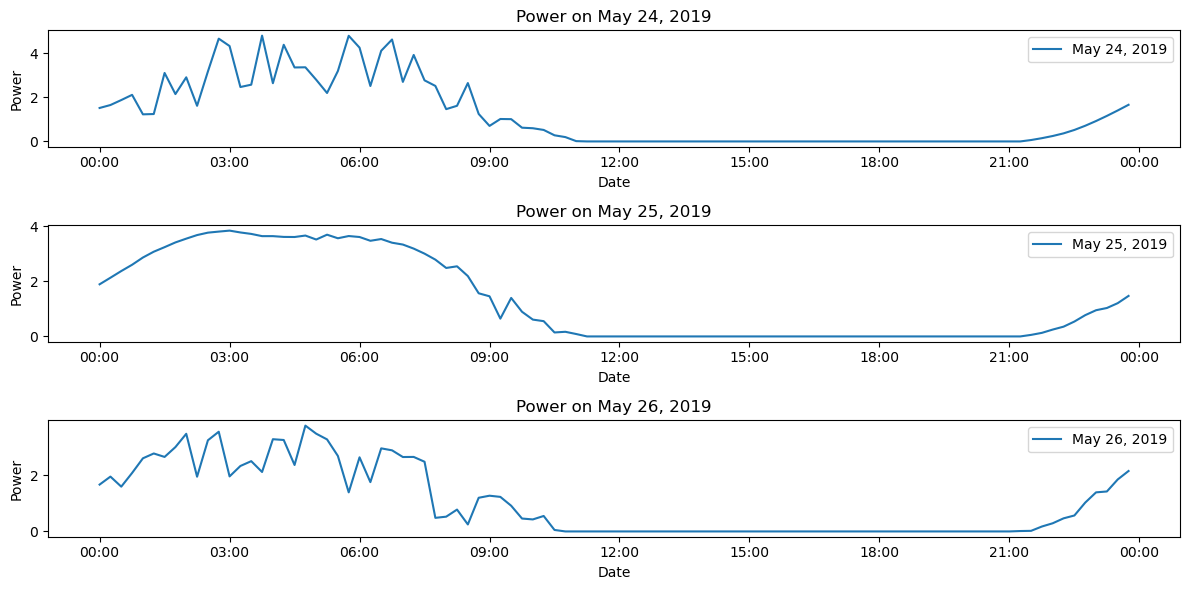

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6))

# Set the x-axis to show the hour of the day
for ax in axs:
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Plot for May 24, 2019
axs[0].plot(may_24_2019['date_time'], may_24_2019['power'], label='May 24, 2019')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Power')
axs[0].set_title('Power on May 24, 2019')
axs[0].legend()

# Plot for May 25, 2019
axs[1].plot(may_25_2019['date_time'], may_25_2019['power'], label='May 25, 2019')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Power')
axs[1].set_title('Power on May 25, 2019')
axs[1].legend()

# Plot for May 26, 2019
axs[2].plot(may_26_2019['date_time'], may_26_2019['power'], label='May 26, 2019')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Power')
axs[2].set_title('Power on May 26, 2019')
axs[2].legend()

plt.tight_layout()
plt.show()